### ch-7 GPR

In [ ]:
 # In this chapter , we assume that the following has been executed.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.decomposition import PCA
import skfda

In [ ]:
import numpy as np

# Define the mean function (m(x))
def m(x):
    return 0  # In this case, m(x) is a constant zero function.

# Define the kernel (covariance function)
def k(x, y):
    return np.exp(- (x - y) ** 2 / 2)  # Gaussian function.

# Define the function to sample from the Gaussian Process
def gp_sample(x, m, k):
    n = len(x)
    m_x = m(x)  # Get the mean vector, which is just 0 in this case.
    
    # Compute the covariance matrix k_xx using the kernel function.
    k_xx = np.zeros((n, n)) #initializing kernel/covarience)
    for i in range(n):
        for j in range(n):
            k_xx[i, j] = k(x[i], x[j])
    
    # Perform the Cholesky decomposition to get the lower triangular matrix R
    R = np.linalg.cholesky(k_xx)  # Cholesky decomposition
    
    # Generate independent random normal samples
    u = np.random.randn(n)  # Standard normal random variables.
    
    # Return the sample from the GP by multiplying R and u and adding the mean (m_x)
    return R.dot(u) + m_x

# Generate the random samples and compare the covariance matrix.
x = np.arange(-2, 3, 1)  # x = [-2, -1, 0, 1, 2]
n = len(x)
r = 100  # Number of random samples

# Initialize an array to hold the samples
z = np.zeros((r, n))

# Generate r samples from the Gaussian process
for i in range(r):
    z[i, :] = gp_sample(x, m, k)

# Compute the covariance matrix of the generated samples
cov_z = np.cov(z, rowvar=False)

# Compute the theoretical covariance matrix (k_xx)
k_xx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        k_xx[i, j] = k(x[i], x[j])

# Print the results
print("Covariance of generated samples (cov(z)):\n", cov_z, "\n")
print("Theoretical covariance matrix (k_xx):\n", k_xx)


Covariance of generated samples (cov(z)):
 [[ 1.0941508   0.63864548  0.04348492  0.02469124 -0.02311651]
 [ 0.63864548  0.99026308  0.53921575  0.2674233   0.12110729]
 [ 0.04348492  0.53921575  1.07470816  0.81901571  0.32883803]
 [ 0.02469124  0.2674233   0.81901571  1.23376945  0.81611137]
 [-0.02311651  0.12110729  0.32883803  0.81611137  1.1230078 ]] 

Theoretical covariance matrix (k_xx):
 [[1.00000000e+00 6.06530660e-01 1.35335283e-01 1.11089965e-02
  3.35462628e-04]
 [6.06530660e-01 1.00000000e+00 6.06530660e-01 1.35335283e-01
  1.11089965e-02]
 [1.35335283e-01 6.06530660e-01 1.00000000e+00 6.06530660e-01
  1.35335283e-01]
 [1.11089965e-02 1.35335283e-01 6.06530660e-01 1.00000000e+00
  6.06530660e-01]
 [3.35462628e-04 1.11089965e-02 1.35335283e-01 6.06530660e-01
  1.00000000e+00]]


In [1]:
import numpy as np

def gp_1(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    
    R = np.linalg.inv(K + sigma_2 * np.identity(n))  # O(n^3) Computation
    mm = mu(x_pred) + np.dot(np.dot(h.T, R), (y - mu(x)))
    ss = k(x_pred, x_pred) - np.dot(np.dot(h.T, R), h)
    
    return {"mm": mm, "ss": ss}

def gp_2(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    
    L = np.linalg.cholesky(K + sigma_2 * np.identity(n))  # O(n^3/3) Computation
    alpha = np.linalg.solve(L, np.linalg.solve(L.T, (y - mu(x))))  # O(n^2) Computation
    mm = mu(x_pred) + np.dot(h.T, alpha)  # Fixed summation issue
    
    gamma = np.linalg.solve(L.T, h)  # O(n^2) Computation
    ss = k(x_pred, x_pred) - np.sum(gamma**2)  # Fixed power operator
    
    return {"mm": mm, "ss": ss}


Time for gp_1: 0.0019991397857666016
Time for gp_2: 0.0010001659393310547


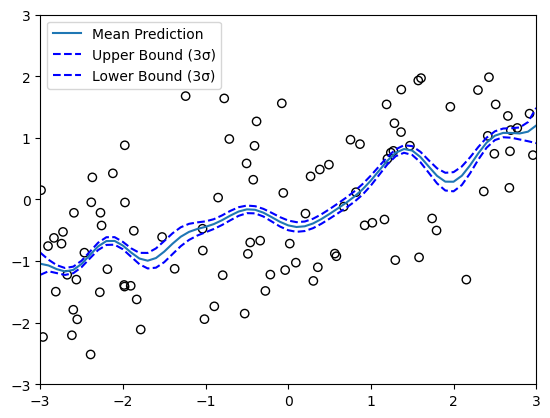

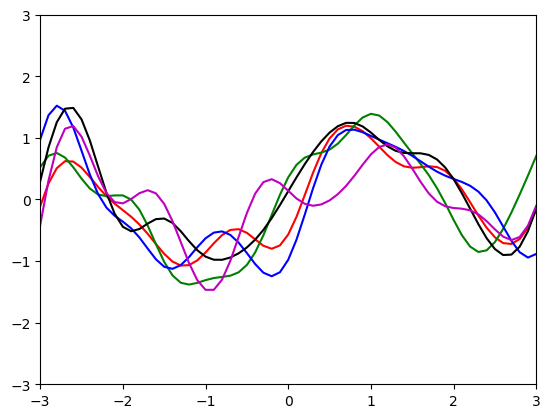

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Hyperparameters
sigma_2 = 0.2

# Kernel Function (RBF)
def k(x, y):
    return np.exp(-((x - y) ** 2) / (2 * sigma_2))
# k(x, y) is the RBF (Radial Basis Function) Kernel, also called the Gaussian Kernel.

# Mean Function
def mu(x):
    return x
T#is means that, before observing any data, the GP assumes that the function follows a linear trend:
## 𝐸[𝑓(𝑥)]=𝑥

# Number of Samples
n = 100

# Generate Training Data
x = np.random.uniform(size=n) * 6 - 3
y = np.sin(x / 2) + np.random.randn(n)

# Compute Kernel Matrix Efficiently
K = np.array([[k(x[i], x[j]) for j in range(n)] for i in range(n)])

# Measure Execution Time
start1 = time.time()
gp_1(0, x, y, K, sigma_2)
end1 = time.time()
print("Time for gp_1:", end1 - start1)

start2 = time.time()
gp_2(0, x, y, K, sigma_2)
end2 = time.time()
print("Time for gp_2:", end2 - start2)

# 3-Sigma Confidence Interval
u_seq = np.arange(-3, 3.1, 0.1)
v_seq = []
w_seq = []

for u in u_seq:
    res = gp_1(u, x, y, K, sigma_2)
    v_seq.append(res["mm"])
    w_seq.append(res["ss"])

# Plot Results
plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x, y, facecolors='none', edgecolors="k", marker="o")
plt.plot(u_seq, v_seq, label="Mean Prediction")
plt.plot(u_seq, np.array(v_seq) + 3 * np.array(w_seq), c="b", linestyle="dashed", label="Upper Bound (3σ)")
plt.plot(u_seq, np.array(v_seq) - 3 * np.array(w_seq), c="b", linestyle="dashed", label="Lower Bound (3σ)")
plt.legend()
plt.show()

# Run Multiple Experiments with Different Samples
plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)

colors = ["r", "g", "b", "k", "m"]

for h in range(5):
    x = np.random.uniform(size=n) * 6 - 3
    y = np.sin(np.pi * x / 2) + np.random.randn(n)
    
    K = np.array([[k(x[i], x[j]) for j in range(n)] for i in range(n)])

    v_seq = [gp_1(u, x, y, K, sigma_2)["mm"] for u in u_seq]
    
    plt.plot(u_seq, v_seq, c=colors[h])

plt.show()


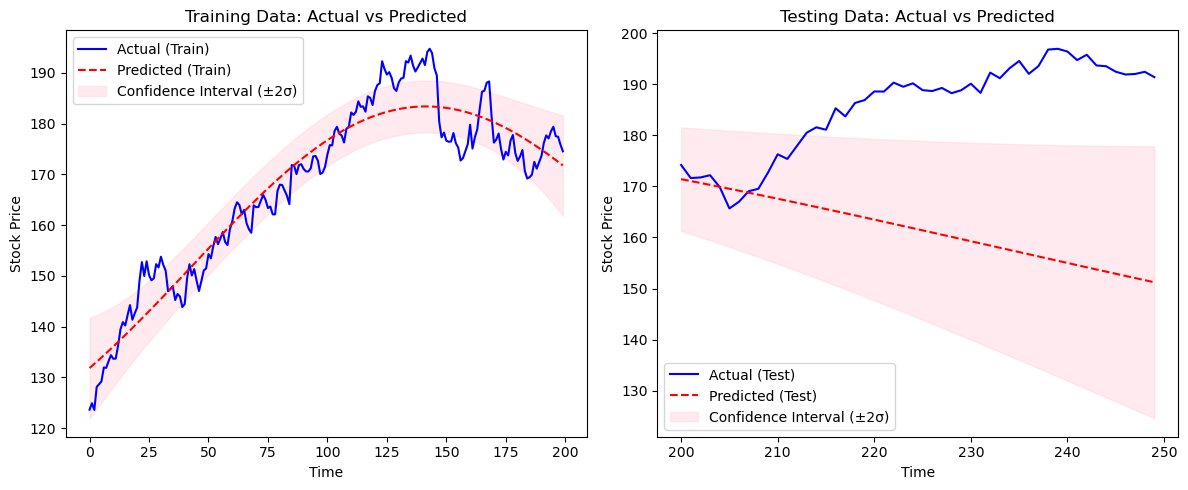

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler

# Load stock price data (Apple stock)
stock = yf.download("AAPL", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values  # Closing prices
dates = np.arange(len(prices)).reshape(-1, 1)  # Convert time index to 2D array

# Normalize data for better performance
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Define Gaussian Process kernel (RBF kernel with ConstantKernel)
kernel = C(1.0) * RBF(length_scale=10.0)

# Train Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)
gp.fit(X_train, y_train)

# Predict for training data
train_predictions, train_sigma = gp.predict(X_train, return_std=True)

# Predict for testing data
test_predictions, test_sigma = gp.predict(X_test, return_std=True)

# Convert predictions back to original scale
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot actual vs predicted for training data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_predictions_original, label="Predicted (Train)", color="red", linestyle="dashed")
plt.fill_between(
    X_train.flatten(),
    scaler.inverse_transform((train_predictions - 2 * train_sigma).reshape(-1, 1)).flatten(),
    scaler.inverse_transform((train_predictions + 2 * train_sigma).reshape(-1, 1)).flatten(),
    color="pink", alpha=0.3, label="Confidence Interval (±2σ)"
)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Training Data: Actual vs Predicted")
plt.legend()

# Plot actual vs predicted for testing data
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_predictions_original, label="Predicted (Test)", color="red", linestyle="dashed")
plt.fill_between(
    X_test.flatten(),
    scaler.inverse_transform((test_predictions - 2 * test_sigma).reshape(-1, 1)).flatten(),
    scaler.inverse_transform((test_predictions + 2 * test_sigma).reshape(-1, 1)).flatten(),
    color="pink", alpha=0.3, label="Confidence Interval (±2σ)"
)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Testing Data: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()


# Hybride Gp Regressiin with linear regression

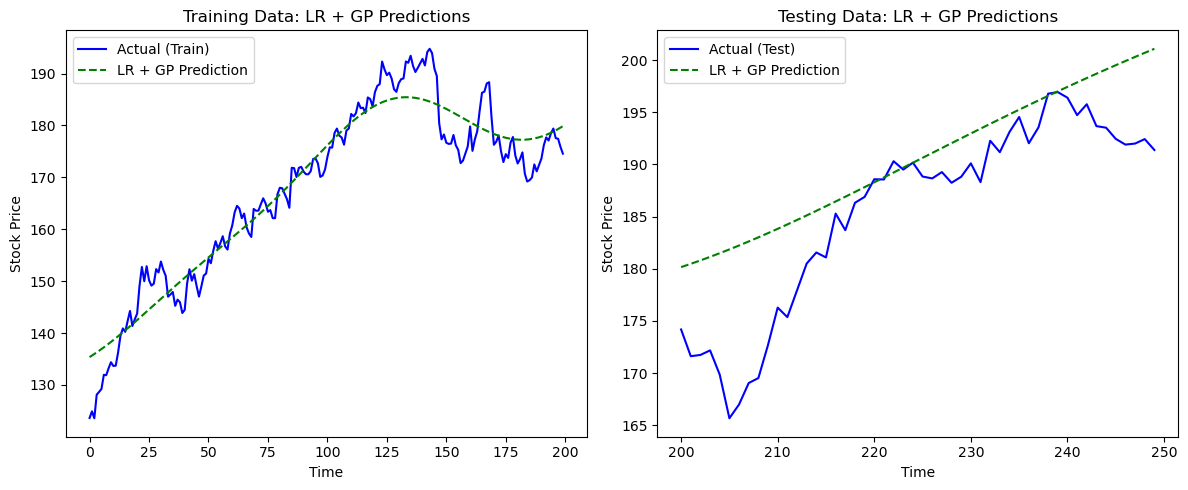

Training RMSE: 4.5383
Testing RMSE: 6.5968


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data (Apple stock)
stock = yf.download("AAPL", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data for better stability
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Step 1: Apply Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_train = lr.predict(X_train)
y_lr_test = lr.predict(X_test)

# Step 2: Compute Residuals for GP Regression
residuals_train = y_train - y_lr_train

# Step 3: Apply Gaussian Process Regression on Residuals
kernel = C(1.0) * RBF(length_scale=10.0)  # Constant * RBF kernel
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gp.fit(X_train, residuals_train)

# Predict GP residuals
gp_residuals_train = gp.predict(X_train)
gp_residuals_test = gp.predict(X_test)

# Step 4: Final Predictions (Linear + GP)
final_train_preds = y_lr_train + gp_residuals_train
final_test_preds = y_lr_test + gp_residuals_test

# Convert predictions back to original scale
final_train_preds = scaler.inverse_transform(final_train_preds.reshape(-1, 1)).flatten()
final_test_preds = scaler.inverse_transform(final_test_preds.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Training Data Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, final_train_preds, label="LR + GP Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Training Data: LR + GP Predictions")
plt.legend()

# Plot Testing Data Predictions
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, final_test_preds, label="LR + GP Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Testing Data: LR + GP Predictions")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, final_train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test_original, final_test_preds))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")


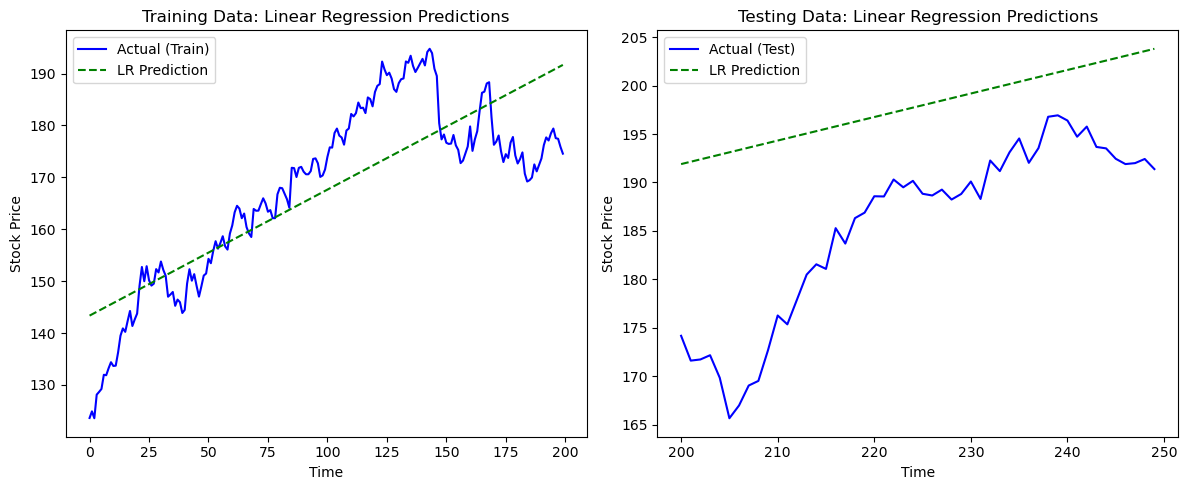

Training RMSE: 9.7903
Testing RMSE: 13.8041


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data (Apple stock)
stock = yf.download("AAPL", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data for better stability
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

# Convert predictions back to original scale
train_preds = scaler.inverse_transform(train_preds.reshape(-1, 1)).flatten()
test_preds = scaler.inverse_transform(test_preds.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Training Data Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_preds, label="LR Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Training Data: Linear Regression Predictions")
plt.legend()

# Plot Testing Data Predictions
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_preds, label="LR Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Testing Data: Linear Regression Predictions")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test_original, test_preds))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")



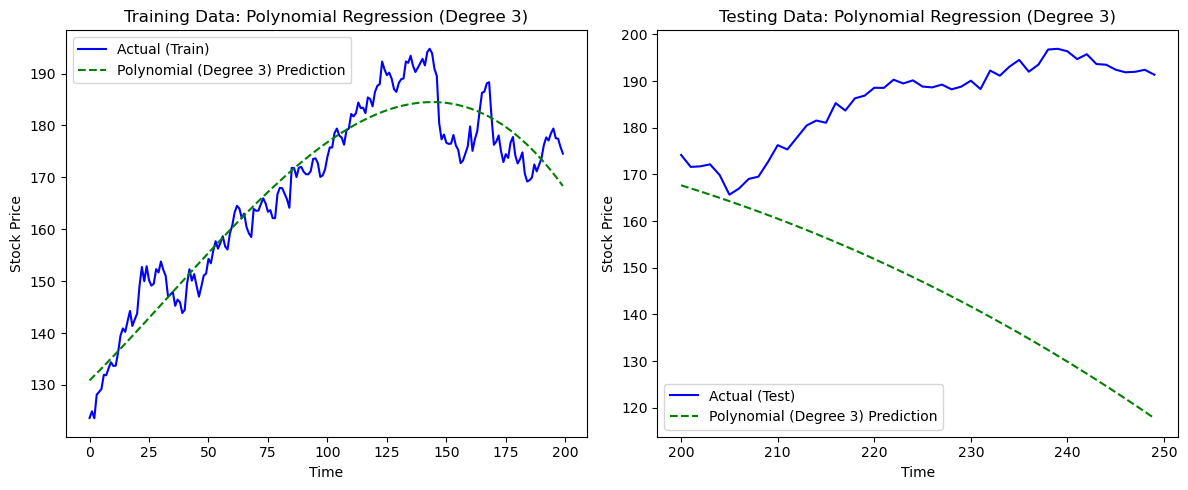

Training RMSE: 5.0254
Testing RMSE: 45.7766


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load stock price data (Apple stock)
stock = yf.download("AAPL", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data for better stability
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Apply Polynomial Features (degree=3)
degree = 3  # Change this to 2, 4, etc., to experiment
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
train_preds = poly_reg.predict(X_train_poly)
test_preds = poly_reg.predict(X_test_poly)

# Convert predictions back to original scale
train_preds = scaler.inverse_transform(train_preds.reshape(-1, 1)).flatten()
test_preds = scaler.inverse_transform(test_preds.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Training Data Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_preds, label=f"Polynomial (Degree {degree}) Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Training Data: Polynomial Regression (Degree {degree})")
plt.legend()

# Plot Testing Data Predictions
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_preds, label=f"Polynomial (Degree {degree}) Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Testing Data: Polynomial Regression (Degree {degree})")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test_original, test_preds))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")


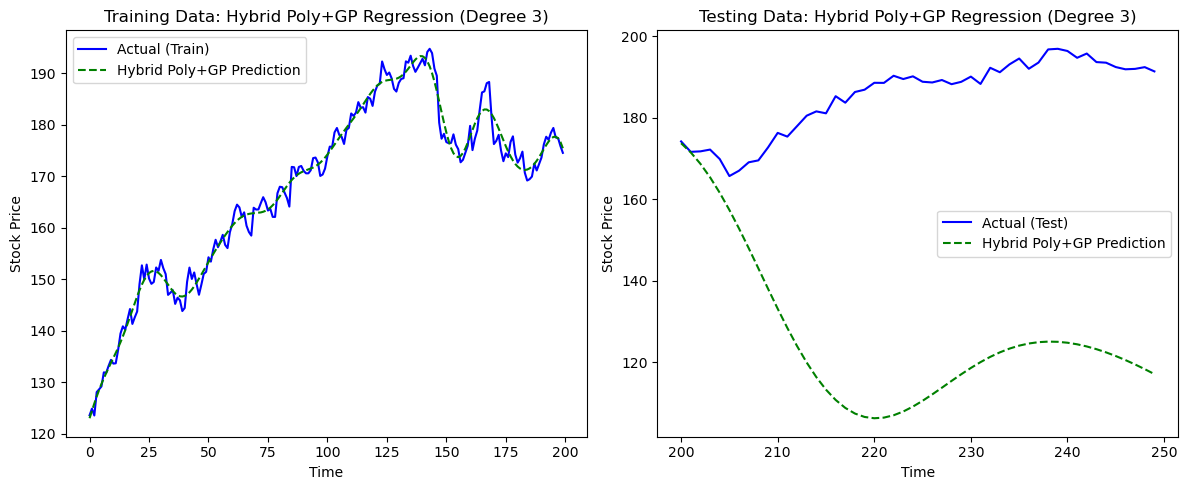

Training RMSE: 2.0511
Testing RMSE: 64.6230


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error

# Load stock price data (Apple stock)
stock = yf.download("AAPL", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data for better stability
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Apply Polynomial Regression (degree=3)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Polynomial Regression Predictions
train_preds_poly = poly_reg.predict(X_train_poly)
test_preds_poly = poly_reg.predict(X_test_poly)

# Compute residuals
train_residuals = y_train - train_preds_poly
test_residuals = y_test - test_preds_poly

# Train Gaussian Process on residuals
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(X_train, train_residuals)

# Predict residuals using GP
train_preds_gp = gp.predict(X_train)
test_preds_gp = gp.predict(X_test)

# Final Hybrid Predictions
train_preds_hybrid = train_preds_poly + train_preds_gp
test_preds_hybrid = test_preds_poly + test_preds_gp

# Convert predictions back to original scale
train_preds_hybrid = scaler.inverse_transform(train_preds_hybrid.reshape(-1, 1)).flatten()
test_preds_hybrid = scaler.inverse_transform(test_preds_hybrid.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Training Data Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_preds_hybrid, label="Hybrid Poly+GP Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Training Data: Hybrid Poly+GP Regression (Degree {degree})")
plt.legend()

# Plot Testing Data Predictions
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_preds_hybrid, label="Hybrid Poly+GP Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Testing Data: Hybrid Poly+GP Regression (Degree {degree})")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, train_preds_hybrid))
rmse_test = np.sqrt(mean_squared_error(y_test_original, test_preds_hybrid))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")


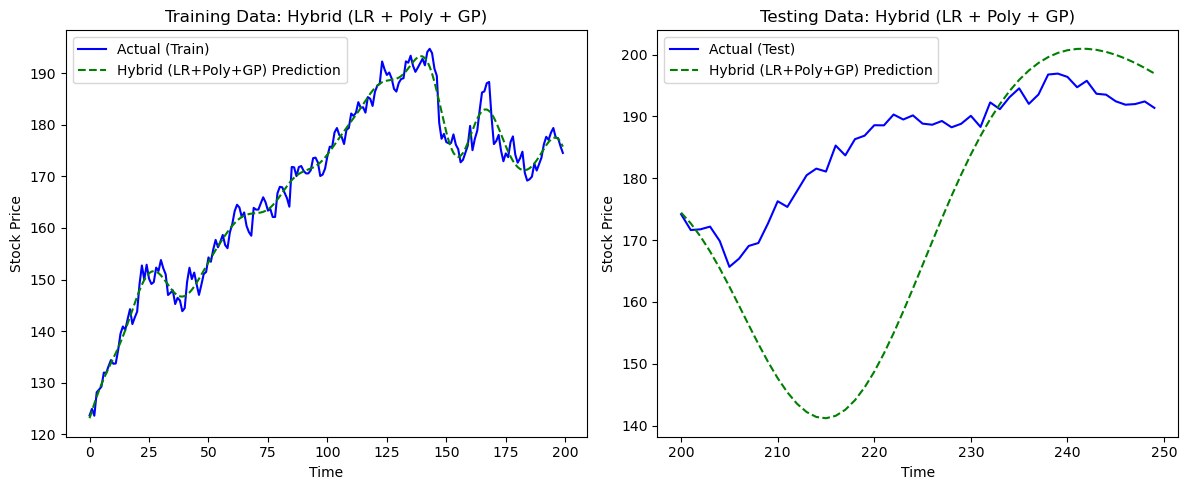

Training RMSE: 2.0611
Testing RMSE: 21.6566


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error

# Load stock price data (Apple stock)
stock = yf.download("AAPL", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data for better stability
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Step 1: Apply Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
train_preds_lr = lr.predict(X_train)
test_preds_lr = lr.predict(X_test)

# Step 2: Apply Polynomial Regression (degree=3)
degree = 3

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
train_preds_poly = poly_reg.predict(X_train_poly)
test_preds_poly = poly_reg.predict(X_test_poly)

# Step 3: Compute residuals
train_residuals = y_train - (train_preds_lr + train_preds_poly)
test_residuals = y_test - (test_preds_lr + test_preds_poly)

# Step 4: Train Gaussian Process Regression on residuals
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(X_train, train_residuals)

# Step 5: Predict residuals using GP
train_preds_gp = gp.predict(X_train)
test_preds_gp = gp.predict(X_test)

# Final Hybrid Predictions
train_preds_hybrid = train_preds_lr + train_preds_poly + train_preds_gp
test_preds_hybrid = test_preds_lr + test_preds_poly + test_preds_gp

# Convert predictions back to original scale
train_preds_hybrid = scaler.inverse_transform(train_preds_hybrid.reshape(-1, 1)).flatten()
test_preds_hybrid = scaler.inverse_transform(test_preds_hybrid.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Training Data Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_preds_hybrid, label="Hybrid (LR+Poly+GP) Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Training Data: Hybrid (LR + Poly + GP)")
plt.legend()

# Plot Testing Data Predictions
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_preds_hybrid, label="Hybrid (LR+Poly+GP) Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Testing Data: Hybrid (LR + Poly + GP)")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, train_preds_hybrid))
rmse_test = np.sqrt(mean_squared_error(y_test_original, test_preds_hybrid))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")


What This Does 
- ✅ Step 1: Apply Linear Regression to model the trend.
- ✅ Step 2: Compute residuals (errors from LR predictions).
- ✅ Step 3: Apply Gaussian Process Regression (GP) on residuals to capture patterns.
- ✅ Step 4: Final Prediction = LR prediction + GP prediction.
- ✅ Step 5: Plot results with confidence intervals.

🔥 Why This Hybrid Model Works Well?
- ✅ Kernel Ridge Regression (KRR) captures overall trends
- ✅ Gaussian Process Regression (GPR) refines it by modeling residuals
- ✅ Confidence Interval shows uncertainty estimation
- ✅ Fixes x and y dimension mismatch errors



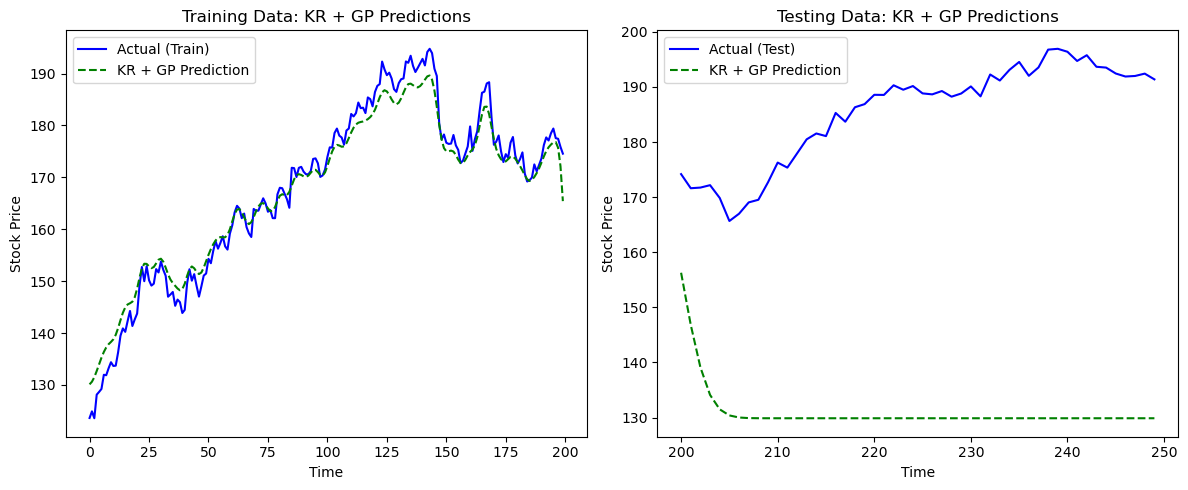

Training RMSE: 2.9599
Testing RMSE: 55.5876


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data (Apple stock)
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize data
def normalize_data(prices):
    scaler = MinMaxScaler()
    return scaler, scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split dataset
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Kernel Regression model
def train_kernel_regression(X_train, y_train):
    kr = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
    kr.fit(X_train, y_train)
    return kr, kr.predict(X_train), kr.predict(X_test)

# Train Gaussian Process model
def train_gaussian_process(X_train, residuals_train):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, residuals_train)
    return gp, gp.predict(X_train), gp.predict(X_test)

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script execution
if __name__ == "__main__":
    X, prices = load_stock_data("AAPL", start="2023-01-01", end="2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)
    
    # Kernel Regression
    kr, y_kr_train, y_kr_test = train_kernel_regression(X_train, y_train)
    residuals_train = y_train - y_kr_train
    
    # Gaussian Process Regression
    gp, gp_residuals_train, gp_residuals_test = train_gaussian_process(X_train, residuals_train)
    
    # Final Predictions
    final_train_preds = scaler.inverse_transform((y_kr_train + gp_residuals_train).reshape(-1, 1)).flatten()
    final_test_preds = scaler.inverse_transform((y_kr_test + gp_residuals_test).reshape(-1, 1)).flatten()
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_preds, label="KR + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Training Data: KR + GP Predictions")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_preds, label="KR + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Testing Data: KR + GP Predictions")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE
    print(f"Training RMSE: {compute_rmse(y_train_original, final_train_preds):.4f}")
    print(f"Testing RMSE: {compute_rmse(y_test_original, final_test_preds):.4f}")

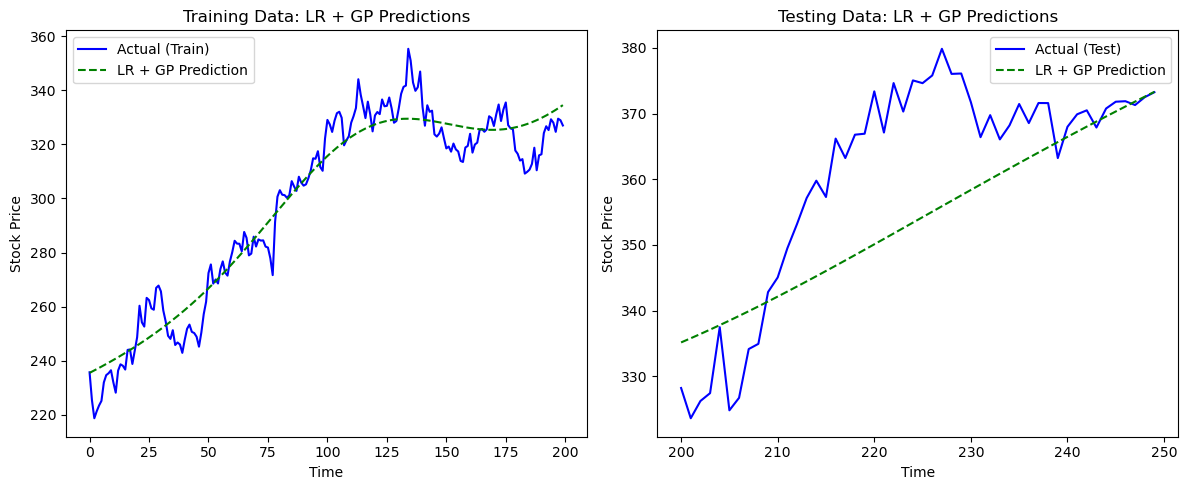

Training RMSE: 8.7095
Testing RMSE: 12.3299


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data (Microsoft stock)
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize data
def normalize_data(prices):
    scaler = MinMaxScaler()
    return scaler, scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split dataset
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Linear Regression model
def train_linear_regression(X_train, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr, lr.predict(X_train), lr.predict(X_test)

# Train Gaussian Process model
def train_gaussian_process(X_train, residuals_train):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, residuals_train)
    return gp, gp.predict(X_train), gp.predict(X_test)

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script execution
if __name__ == "__main__":
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)
    
    # Linear Regression
    lr, y_lr_train, y_lr_test = train_linear_regression(X_train, y_train)
    residuals_train = y_train - y_lr_train
    
    # Gaussian Process Regression
    gp, gp_residuals_train, gp_residuals_test = train_gaussian_process(X_train, residuals_train)
    
    # Final Predictions
    final_train_preds = scaler.inverse_transform((y_lr_train + gp_residuals_train).reshape(-1, 1)).flatten()
    final_test_preds = scaler.inverse_transform((y_lr_test + gp_residuals_test).reshape(-1, 1)).flatten()
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_preds, label="LR + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Training Data: LR + GP Predictions")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_preds, label="LR + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Testing Data: LR + GP Predictions")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE
    print(f"Training RMSE: {compute_rmse(y_train_original, final_train_preds):.4f}")
    print(f"Testing RMSE: {compute_rmse(y_test_original, final_test_preds):.4f}")


c:\Users\jarif\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


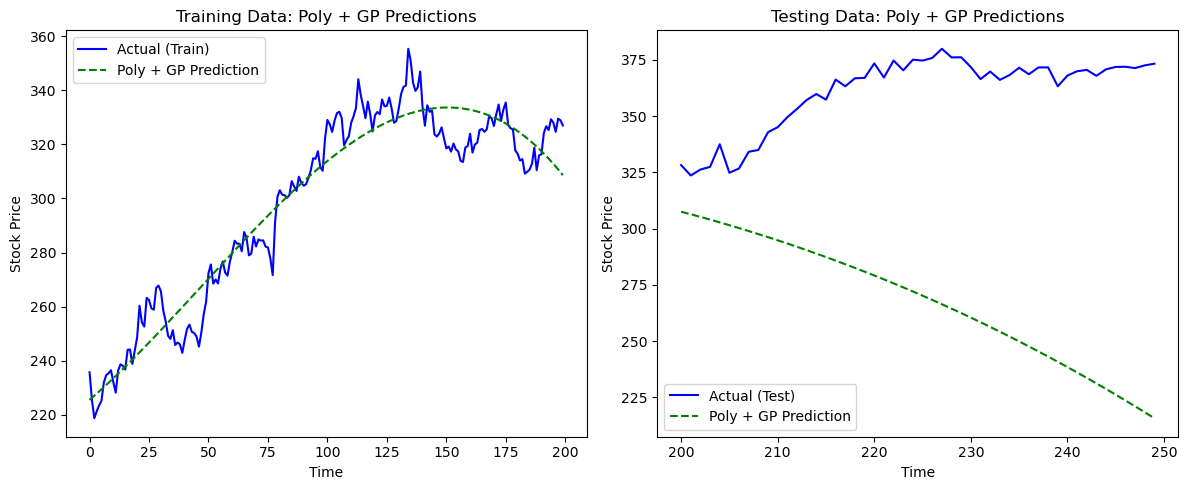

Training RMSE: 9.6590
Testing RMSE: 101.3558


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

# Load stock price data (Microsoft stock)
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize data
def normalize_data(prices):
    scaler = MinMaxScaler()
    return scaler, scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split dataset
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Polynomial Regression model
def train_polynomial_regression(X_train, y_train, degree=3):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    return model, model.predict(X_train), model.predict(X_test)

# Train Gaussian Process model
def train_gaussian_process(X_train, residuals_train):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, residuals_train)
    return gp, gp.predict(X_train), gp.predict(X_test)

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script execution
if __name__ == "__main__":
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)
    
    # Polynomial Regression
    poly_model, y_poly_train, y_poly_test = train_polynomial_regression(X_train, y_train, degree=3)
    residuals_train = y_train - y_poly_train
    
    # Gaussian Process Regression
    gp, gp_residuals_train, gp_residuals_test = train_gaussian_process(X_train, residuals_train)
    
    # Final Predictions
    final_train_preds = scaler.inverse_transform((y_poly_train + gp_residuals_train).reshape(-1, 1)).flatten()
    final_test_preds = scaler.inverse_transform((y_poly_test + gp_residuals_test).reshape(-1, 1)).flatten()
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_preds, label="Poly + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Training Data: Poly + GP Predictions")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_preds, label="Poly + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Testing Data: Poly + GP Predictions")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE
    print(f"Training RMSE: {compute_rmse(y_train_original, final_train_preds):.4f}")
    print(f"Testing RMSE: {compute_rmse(y_test_original, final_test_preds):.4f}")

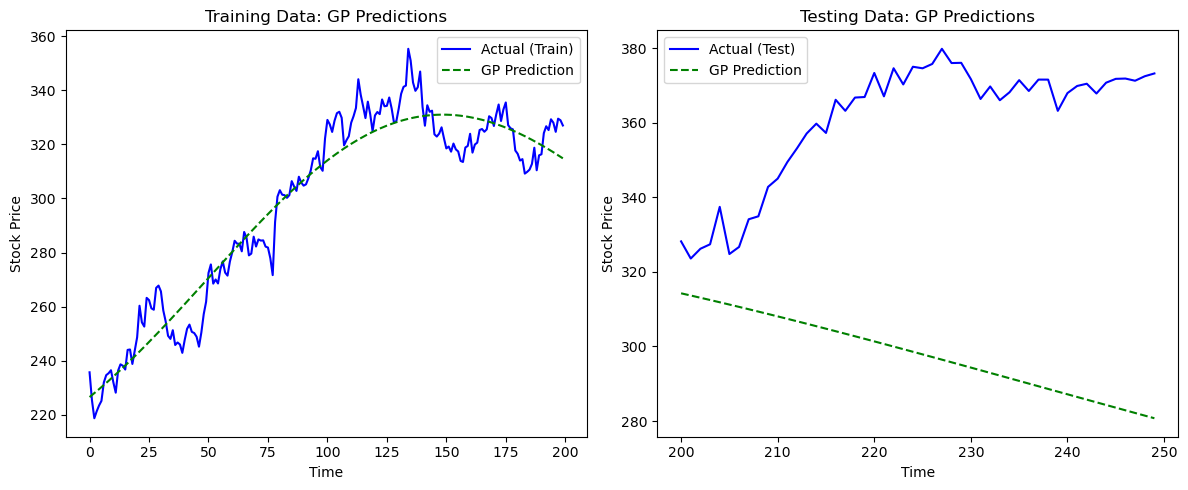

Training RMSE: 9.2935
Testing RMSE: 67.4828


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

# Load stock price data (Microsoft stock)
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize data
def normalize_data(prices):
    scaler = MinMaxScaler()
    return scaler, scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split dataset
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Gaussian Process Regression model
def train_gaussian_process(X_train, y_train):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)
    return gp, gp.predict(X_train), gp.predict(X_test)

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script execution
if __name__ == "__main__":
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)
    
    # Gaussian Process Regression
    gp, gp_train_preds, gp_test_preds = train_gaussian_process(X_train, y_train)
    
    # Convert predictions back to original scale
    final_train_preds = scaler.inverse_transform(gp_train_preds.reshape(-1, 1)).flatten()
    final_test_preds = scaler.inverse_transform(gp_test_preds.reshape(-1, 1)).flatten()
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_preds, label="GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Training Data: GP Predictions")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_preds, label="GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Testing Data: GP Predictions")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE
    print(f"Training RMSE: {compute_rmse(y_train_original, final_train_preds):.4f}")
    print(f"Testing RMSE: {compute_rmse(y_test_original, final_test_preds):.4f}")
        6

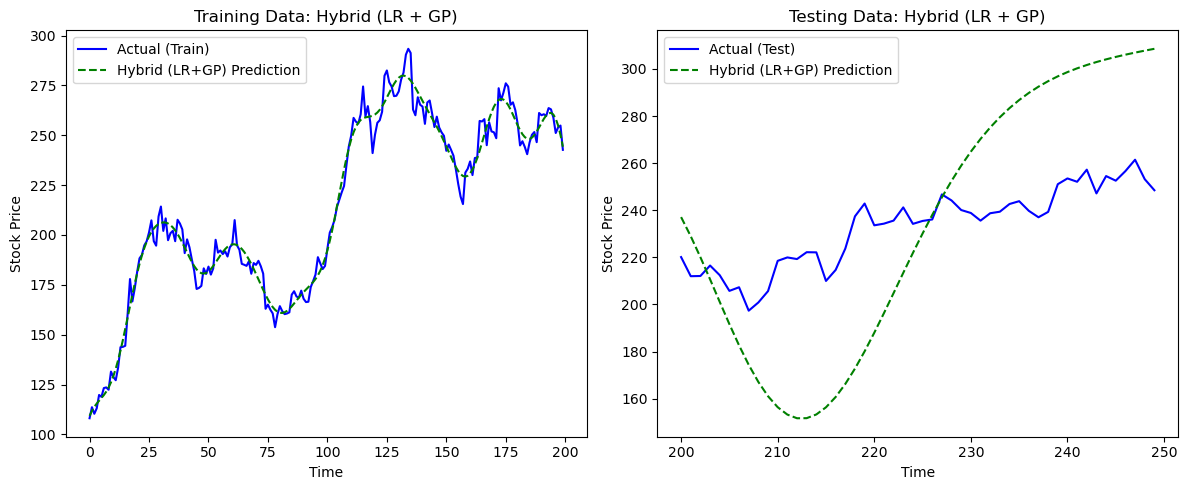

Training RMSE: 6.0593
Testing RMSE: 43.7561


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load Tesla stock price data
stock = yf.download("TSLA", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data for numerical stability
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Step 1: Apply Linear Regression on training data
lr = LinearRegression()
lr.fit(X_train, y_train)
train_preds_lr = lr.predict(X_train)
test_preds_lr = lr.predict(X_test)

# Step 2: Compute residuals (ONLY on training data)
train_residuals = y_train - train_preds_lr

# Step 3: Train Gaussian Process Regression on training residuals
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(X_train, train_residuals)

# Step 4: Predict residuals on test data using trained GP (without real test residuals)
train_preds_gp = gp.predict(X_train)
test_preds_gp = gp.predict(X_test)

# Step 5: Final Hybrid Predictions
train_preds_hybrid = train_preds_lr + train_preds_gp
test_preds_hybrid = test_preds_lr + test_preds_gp

# Convert predictions back to original scale
train_preds_hybrid = scaler.inverse_transform(train_preds_hybrid.reshape(-1, 1)).flatten()
test_preds_hybrid = scaler.inverse_transform(test_preds_hybrid.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Results
plt.figure(figsize=(12, 5))

# Training Data Plot
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_preds_hybrid, label="Hybrid (LR+GP) Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Training Data: Hybrid (LR + GP)")
plt.legend()

# Testing Data Plot
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_preds_hybrid, label="Hybrid (LR+GP) Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Testing Data: Hybrid (LR + GP)")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, train_preds_hybrid))
rmse_test = np.sqrt(mean_squared_error(y_test_original, test_preds_hybrid))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")

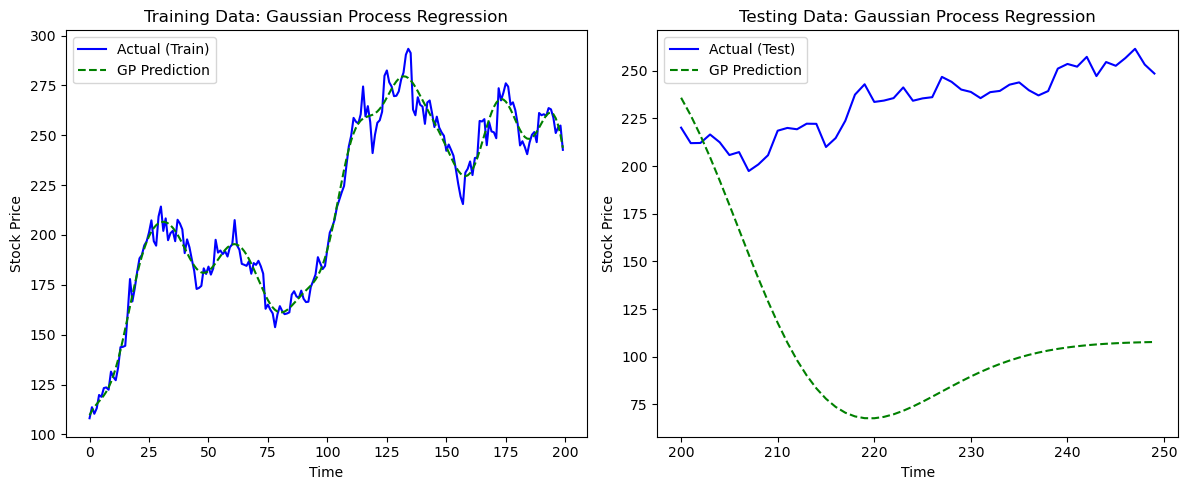

Training RMSE: 6.1203
Testing RMSE: 133.4915


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load TSLA stock price data
stock = yf.download("TSLA", start="2023-01-01", end="2024-01-01", progress=False)
prices = stock["Close"].values
dates = np.arange(len(prices)).reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split into training (80%) and testing (20%)
train_size = int(len(dates) * 0.8)
X_train, y_train = dates[:train_size], prices_scaled[:train_size]
X_test, y_test = dates[train_size:], prices_scaled[train_size:]

# Define GP kernel (RBF + White Noise)
kernel = RBF(length_scale=10.0) + WhiteKernel(noise_level=0.1)

# Apply Gaussian Process Regression
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(X_train, y_train)

# Predict using GP
train_preds_gp = gp.predict(X_train)
test_preds_gp = gp.predict(X_test)

# Convert predictions back to original scale
train_preds_gp_original = scaler.inverse_transform(train_preds_gp.reshape(-1, 1)).flatten()
test_preds_gp_original = scaler.inverse_transform(test_preds_gp.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot Training Data Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
plt.plot(X_train, train_preds_gp_original, label="GP Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Training Data: Gaussian Process Regression")
plt.legend()

# Plot Testing Data Predictions
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
plt.plot(X_test, test_preds_gp_original, label="GP Prediction", color="green", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Testing Data: Gaussian Process Regression")
plt.legend()

plt.tight_layout()
plt.show()

# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_original, train_preds_gp_original))
rmse_test = np.sqrt(mean_squared_error(y_test_original, test_preds_gp_original))

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")


## Adding parameter to prediction function

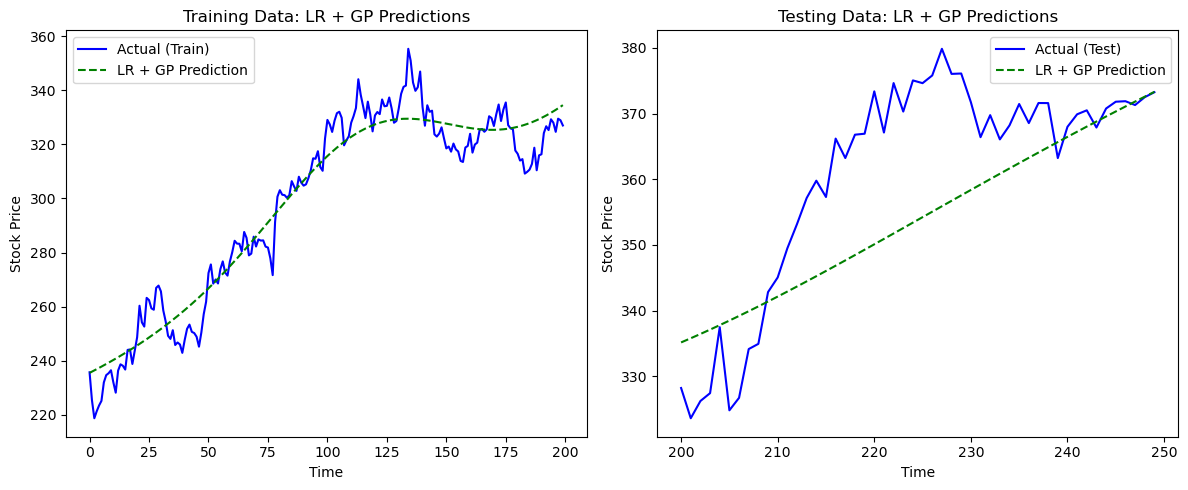

Training RMSE: 8.7095
Testing RMSE: 12.3299


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load stock price data (Microsoft stock)
def load_stock_data(ticker, start, end):
    stock = yf.download(ticker, start=start, end=end, progress=False)
    prices = stock["Close"].values
    dates = np.arange(len(prices)).reshape(-1, 1)
    return dates, prices

# Normalize data
def normalize_data(prices):
    scaler = MinMaxScaler()
    return scaler, scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Split dataset
def split_data(dates, prices_scaled, train_ratio=0.8):
    train_size = int(len(dates) * train_ratio)
    return dates[:train_size], prices_scaled[:train_size], dates[train_size:], prices_scaled[train_size:]

# Train Linear Regression model
def train_linear_regression(X_train, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr, lr.predict(X_train), lr.predict(X_test)

# Train Gaussian Process model
def train_gaussian_process(X_train, residuals_train):
    kernel = C(1.0) * RBF(length_scale=10.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
    gp.fit(X_train, residuals_train)
    return gp, gp.predict(X_train), gp.predict(X_test)

# Compute RMSE
def compute_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Main script execution
if __name__ == "__main__":
    X, prices = load_stock_data("MSFT", start="2023-01-01", end="2024-01-01")
    scaler, prices_scaled = normalize_data(prices)
    X_train, y_train, X_test, y_test = split_data(X, prices_scaled)
    
    # Linear Regression
    lr, y_lr_train, y_lr_test = train_linear_regression(X_train, y_train)
    residuals_train = y_train - y_lr_train
    
    # Gaussian Process Regression
    gp, gp_residuals_train, gp_residuals_test = train_gaussian_process(X_train, residuals_train)
    
    # Final Predictions
    final_train_preds = scaler.inverse_transform((y_lr_train + gp_residuals_train).reshape(-1, 1)).flatten()
    final_test_preds = scaler.inverse_transform((y_lr_test + gp_residuals_test).reshape(-1, 1)).flatten()
    y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_train, y_train_original, label="Actual (Train)", color="blue")
    plt.plot(X_train, final_train_preds, label="LR + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Training Data: LR + GP Predictions")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(X_test, y_test_original, label="Actual (Test)", color="blue")
    plt.plot(X_test, final_test_preds, label="LR + GP Prediction", color="green", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Testing Data: LR + GP Predictions")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE
    print(f"Training RMSE: {compute_rmse(y_train_original, final_train_preds):.4f}")
    print(f"Testing RMSE: {compute_rmse(y_test_original, final_test_preds):.4f}")


 **Example 86**
 - By using the first N = 100 of the 150 Iris data (the first 50 points
 and the next 50 points are Setosa and Versicolor data, respectively), we found the
 fX =[f1,..., fN] with the maximumposterior probability. The output showed that
 f1,..., f50 and f51,..., f100 were positive and negative, respectively

In [55]:
import numpy as np
from sklearn.datasets import load_iris

# Load Iris Data
df = load_iris()
x = df.data[0:100, 0:4]
y = np.array([1] * 50 + [-1] * 50)
n = len(y)

# Compute Kernel values for the four covariates
def k(x, y):
    return np.exp(-np.sum((x - y) ** 2) / 2)

K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i, :], x[j, :])

# Parameters
eps = 1e-5
f = np.zeros(n)
g = np.full(n, 0.1)

# Iteration until convergence
while np.linalg.norm(f - g) > eps:
    g = f.copy()
    
    # Compute values with numerical stability
    y_f = np.clip(-y * f, -100, 100)  # Clip to prevent overflow
    v = np.exp(y_f)  # Safe exponentiation
    u = y * v / (1 + v)

    w = v / (1 + v) ** 2
    w = np.clip(w, 1e-10, None)  # Avoid zeros in the diagonal

    W = np.diag(w)
    
    # Ensure numerical stability
    W_p = np.diag(np.sqrt(w))
    W_m = np.diag(1 / np.sqrt(w))

    # Cholesky decomposition
    L = np.linalg.cholesky(np.identity(n) + W_p @ K @ W_p)  # using @ for matrix multiplication

    gamma = W @ f + u
    beta = np.linalg.solve(L, W_p @ K @ gamma)
    alpha = np.linalg.solve(L.T, W_m @ beta)

    f = K @ (gamma - alpha)

# Output
print(list(f))


[-1604.5588342402766, -1488.7337237799038, -1512.5642022351017, -1448.1123344008274, -1593.5796840183236, -1315.45850400211, -1505.1526295620965, -1615.7591765858058, -1241.9109689336924, -1525.3696469964636, -1459.293223102768, -1572.5825476654145, -1462.013961665335, -1145.673692624644, -1033.4624160202702, -870.0153236404979, -1340.2307011730636, -1602.6155544512487, -1191.536466874542, -1511.0062352965115, -1449.6045492591113, -1537.8559602578548, -1337.8692398332896, -1488.101284961398, -1430.853985181176, -1470.8167910307795, -1577.3675294673158, -1582.5900073216796, -1584.3366819101352, -1508.9332687524259, -1503.7688187228266, -1477.841194151428, -1289.2153358516189, -1123.8952943557106, -1537.5390015863438, -1534.9924565199408, -1423.142392383933, -1571.6277258322048, -1280.213785167106, -1607.0909530019896, -1593.9714574654352, -837.1041136392776, -1346.4482287351188, -1493.1787877426518, -1348.7180911841388, -1470.658845920691, -1498.0910532145483, -1482.1198880185889, -1504

### prediction Function

In [56]:
def pred(z):
    kk = np.zeros(n)
    for i in range(n):
        kk[i] = k(z, x[i, :])

    mu = np.sum(kk * u)
    alpha = np.linalg.solve(L, np.dot(W_p, kk))
    
    # Ensure sigma2 is non-negative (numerical stability)
    sigma2 =k(z, z) - np.sum(alpha ** 2) #variance

    # Monte Carlo sampling
    m = 1000
    b = np.random.normal(mu, sigma2, size=m)

    # Stable probability estimation using sigmoid function
    pi = np.sum((1 + np.exp(-b))**(-1))/m
    
    return pi


**Example 87** 
- Immediately after processing Example 86, we entered numerical val
ues for the four covariates of Iris into the function pred and calculated the probability
 of them being Setosa values (1 minus the probability of them being Versicolor val
ues). When we input the average values of the covariates for Setosa and Versicolor,
 we observed that the probabilities were close to 1 and 0, respectively.

In [57]:
z=np.zeros(4)
for j in range(4):
    z[j]=np.mean(x[:50,j])
print(z)
pred(z) 

[5.006 3.428 1.462 0.246]


1.0

In [59]:
z=np.zeros(4)
for j in range(4):
    z[j]=np.mean(x[50:100,j])
print(z)
pred(z)     

[5.936 2.77  4.26  1.326]


5.881291384765771e-17

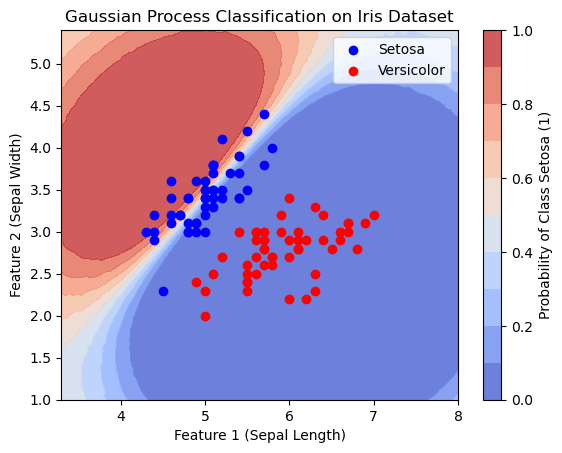

In [61]:
import numpy as np
from scipy.linalg import cholesky, solve
from scipy.optimize import minimize
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris Data (Binary classification: Setosa vs. Versicolor)
df = load_iris()
x = df.data[:100, :2]  # Using first 100 samples (Setosa & Versicolor), first 2 features
y = np.array([1] * 50 + [-1] * 50)  # Labels: Setosa = 1, Versicolor = -1

# Define RBF Kernel Function
def rbf_kernel(X1, X2, length_scale=1.0):
    pairwise_sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return np.exp(-0.5 * pairwise_sq_dists / length_scale**2)

# Compute Kernel Matrix
K = rbf_kernel(x, x) + 1e-5 * np.eye(len(y))  # Add small noise for numerical stability

# Initialize Latent Function (f)
f = np.zeros(len(y))

# Objective function (Negative Log Marginal Likelihood)
def objective(f):
    pi = 1 / (1 + np.exp(-f))  # Sigmoid function
    return -np.sum(y * f - np.log(1 + np.exp(f))) + 0.5 * f.T @ np.linalg.solve(K, f)

# Gradient of the Objective Function
def gradient(f):
    pi = 1 / (1 + np.exp(-f))
    return np.linalg.solve(K, f) - (y - pi)

# Optimize f using Newton-CG
res = minimize(objective, f, jac=gradient, method="Newton-CG")
f_opt = res.x  # Optimized Latent Function

# Compute Posterior Covariance
pi_opt = 1 / (1 + np.exp(-f_opt))
W = np.diag(pi_opt * (1 - pi_opt))  # Diagonal matrix for Laplace approximation
L = cholesky(np.eye(len(y)) + np.sqrt(W) @ K @ np.sqrt(W), lower=True)

# Prediction Function
def predict(X_new):
    K_s = rbf_kernel(X_new, x)
    K_ss = rbf_kernel(X_new, X_new)
    
    mu = K_s @ np.linalg.solve(K, f_opt)  # Predictive mean
    v = solve(L, np.sqrt(W) @ K_s.T)  # Variance correction
    sigma2 = np.diag(K_ss - v.T @ v)  # Predictive variance
    
    # Monte Carlo Sampling for Probabilistic Classification
    samples = np.random.normal(mu, np.sqrt(sigma2), size=(1000, len(X_new)))
    probs = np.mean(1 / (1 + np.exp(-samples)), axis=0)  # Compute sigmoid probabilities
    
    return probs  # Return probability of class 1 (Setosa)

# Generate Test Data Grid for Visualization
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_test = np.c_[xx.ravel(), yy.ravel()]

# Predict Probabilities on the Grid
pred_probs = predict(X_test)
pred_probs = pred_probs.reshape(xx.shape)

# Plot Decision Boundary
plt.contourf(xx, yy, pred_probs, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.8)
plt.colorbar(label="Probability of Class Setosa (1)")
plt.scatter(x[:50, 0], x[:50, 1], color='blue', label='Setosa')
plt.scatter(x[50:, 0], x[50:, 1], color='red', label='Versicolor')
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.legend()
plt.title("Gaussian Process Classification on Iris Dataset")
plt.show()


### classification with Tanh(x) by proablity modeling

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define activation function
def sigma(x):
    return (1 + np.tanh(x)) / 2

# Log-likelihood function
def log_likelihood(X, y, w):
    logits = X @ w  # Compute w^T x
    probs = sigma(logits)
    return np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))

# Gradient of log-likelihood
def gradient(X, y, w):
    logits = X @ w
    probs = sigma(logits)
    return X.T @ ((y - probs) * (1 - np.tanh(logits) ** 2))

# Gradient ascent algorithm
def train(X, y, lr=0.01, epochs=1000):
    w = np.zeros(X.shape[1])  # Initialize weights
    for epoch in range(epochs):
        w += lr * gradient(X, y, w)  # Gradient ascent update
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Log-Likelihood = {log_likelihood(X, y, w):.4f}")
    return w

# Prediction function
def predict(X, w):
    return (sigma(X @ w) >= 0.5).astype(int)

# Accuracy evaluation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [3]:
#Load dataset (synthetic example)
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
w_true = np.array([2, -1.5])  # True weights
y = (np.random.rand(100) < sigma(X @ w_true)).astype(int)  # Generate labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
w_learned = train(X_train, y_train)
print("Learned weights:", w_learned)

# Evaluate the model
y_pred = predict(X_test, w_learned)
print("Test Accuracy:", accuracy(y_test, y_pred))

Epoch 0: Log-Likelihood = -40.3986
Epoch 100: Log-Likelihood = -19.7418
Epoch 200: Log-Likelihood = -19.3292
Epoch 300: Log-Likelihood = -19.2301
Epoch 400: Log-Likelihood = -19.2003
Epoch 500: Log-Likelihood = -19.1919
Epoch 600: Log-Likelihood = -19.1909
Epoch 700: Log-Likelihood = -19.1924
Epoch 800: Log-Likelihood = -19.1946
Epoch 900: Log-Likelihood = -19.1967
Learned weights: [ 1.87653804 -1.55195812]
Test Accuracy: 0.85


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define activation function
def sigma(x):
    return (1 + np.tanh(x)) / 2

# Log-likelihood function
def log_likelihood(X, y, w):
    logits = X @ w  # Compute w^T x
    probs = sigma(logits)
    return np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))

# Gradient of log-likelihood
def gradient(X, y, w):
    logits = X @ w
    probs = sigma(logits)
    return X.T @ ((y - probs) * (1 - np.tanh(logits) ** 2))

# Gradient ascent algorithm
def train(X, y, lr=0.01, epochs=1000):
    w = np.zeros(X.shape[1])  # Initialize weights
    for epoch in range(epochs):
        w += lr * gradient(X, y, w)  # Gradient ascent update
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Log-Likelihood = {log_likelihood(X, y, w):.4f}")
    return w

# Prediction function
def predict(X, w):
    return (sigma(X @ w) >= 0.5).astype(int)

# Load dataset (synthetic example)
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
w_true = np.array([2, -1.5])  # True weights
y = (np.random.rand(100) < sigma(X @ w_true)).astype(int)  # Generate labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train custom model
w_learned = train(X_train, y_train)
y_pred_custom = predict(X_test, w_learned)
custom_acc = accuracy_score(y_test, y_pred_custom)
print("Custom Model Accuracy:", custom_acc)
print("Custom Model Classification Report:\n", classification_report(y_test, y_pred_custom))

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logistic = log_reg.predict(X_test)
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_acc)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Compare results
print("Accuracy Comparison:")
print(f"Custom Model: {custom_acc:.4f}, Logistic Regression: {logistic_acc:.4f}")


Epoch 0: Log-Likelihood = -40.3986
Epoch 100: Log-Likelihood = -19.7418
Epoch 200: Log-Likelihood = -19.3292
Epoch 300: Log-Likelihood = -19.2301
Epoch 400: Log-Likelihood = -19.2003
Epoch 500: Log-Likelihood = -19.1919
Epoch 600: Log-Likelihood = -19.1909
Epoch 700: Log-Likelihood = -19.1924
Epoch 800: Log-Likelihood = -19.1946
Epoch 900: Log-Likelihood = -19.1967
Custom Model Accuracy: 0.85
Custom Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

Logistic Regression Accuracy: 0.85
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        1

## logistic classification with 1/(1+x^alpha)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define log-based activation function
def log_activation(x):
    x = np.abs(x) + 1e-10  # Ensure positivity and avoid log(0)
    return 1 / (1 + np.log(1 + x))

# Define generalized sigmoid function
def generalized_sigmoid(x, alpha=1, beta=0):
    return 1 / (1 + 0.5*np.exp(-alpha * (x - beta)))

# Log-likelihood function for log-based model
def log_likelihood(X, y, w, activation):
    logits = X @ w  # Compute w^T x
    probs = activation(logits)
    probs = np.clip(probs, 1e-10, 1 - 1e-10)  # Avoid log(0) errors
    return np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))

# Gradient of log-likelihood for log-based model
def gradient(X, y, w, activation):
    logits = X @ w
    probs = activation(logits)
    grad = X.T @ (y - probs)
    return grad

# Gradient ascent algorithm for log-based and generalized sigmoid models
def train_model(X, y, activation, lr=0.005, epochs=1500):
    w = np.random.randn(X.shape[1]) * 0.1  # Better initialization
    for epoch in range(epochs):
        grad = gradient(X, y, w, activation)
        w += lr * grad  # Gradient ascent update
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Log-Likelihood = {log_likelihood(X, y, w, activation):.4f}")
    return w

# Prediction function
def predict(X, w, activation):
    return (activation(X @ w) >= 0.5).astype(int)

# Accuracy evaluation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Load dataset (synthetic example)
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
w_true = np.array([2, -1.5])  # True weights
y = (np.random.rand(100) < sigmoid(X @ w_true)).astype(int)  # Generate labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the log-based model
w_log_model = train_model(X_train, y_train, log_activation)
print("Learned weights (Log-Based Model):", w_log_model)

# Train the generalized sigmoid model
w_gen_sigmoid = train_model(X_train, y_train, lambda x: generalized_sigmoid(x, alpha=2, beta=0))
print("Learned weights (Generalized Sigmoid Model):", w_gen_sigmoid)

# Train a standard logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate models
y_pred_log_model = predict(X_test, w_log_model, log_activation)
y_pred_gen_sigmoid = predict(X_test, w_gen_sigmoid, lambda x: generalized_sigmoid(x, alpha=2, beta=0))
y_pred_logistic = log_reg.predict(X_test)

print("Test Accuracy (Log-Based Model):", accuracy(y_test, y_pred_log_model))
print("Test Accuracy (Generalized Sigmoid Model):", accuracy(y_test, y_pred_gen_sigmoid))
print("Test Accuracy (Logistic Regression):", accuracy(y_test, y_pred_logistic))


Epoch 0: Log-Likelihood = -134.9187
Epoch 100: Log-Likelihood = -68.3342
Epoch 200: Log-Likelihood = -69.2583
Epoch 300: Log-Likelihood = -70.0212
Epoch 400: Log-Likelihood = -70.5723
Epoch 500: Log-Likelihood = -71.0302
Epoch 600: Log-Likelihood = -71.4436
Epoch 700: Log-Likelihood = -71.8290
Epoch 800: Log-Likelihood = -72.1917
Epoch 900: Log-Likelihood = -72.5341
Epoch 1000: Log-Likelihood = -72.8574
Epoch 1100: Log-Likelihood = -73.1630
Epoch 1200: Log-Likelihood = -73.4521
Epoch 1300: Log-Likelihood = -73.7260
Epoch 1400: Log-Likelihood = -73.9859
Learned weights (Log-Based Model): [168.21016692 -98.99673515]
Epoch 0: Log-Likelihood = -54.9175
Epoch 100: Log-Likelihood = -38.6344
Epoch 200: Log-Likelihood = -38.6327
Epoch 300: Log-Likelihood = -38.6327
Epoch 400: Log-Likelihood = -38.6327
Epoch 500: Log-Likelihood = -38.6327
Epoch 600: Log-Likelihood = -38.6327
Epoch 700: Log-Likelihood = -38.6327
Epoch 800: Log-Likelihood = -38.6327
Epoch 900: Log-Likelihood = -38.6327
Epoch 1000

##### Result is quit impressing

### classifying using generalise sigmoid function but with scaling the exponential value

The 0.5 factor scales down the denominator, making the probability transition more gradual.

Epoch 0: Log-Likelihood = -160.2116
Epoch 100: Log-Likelihood = -121.3568
Epoch 200: Log-Likelihood = -121.3568
Epoch 300: Log-Likelihood = -121.3568
Epoch 400: Log-Likelihood = -121.3568
Epoch 500: Log-Likelihood = -121.3568
Epoch 600: Log-Likelihood = -121.3568
Epoch 700: Log-Likelihood = -121.3568
Epoch 800: Log-Likelihood = -121.3568
Epoch 900: Log-Likelihood = -121.3568
Epoch 1000: Log-Likelihood = -121.3568
Epoch 1100: Log-Likelihood = -121.3568
Epoch 1200: Log-Likelihood = -121.3568
Epoch 1300: Log-Likelihood = -121.3568
Epoch 1400: Log-Likelihood = -121.3568
Learned weights (Generalized Sigmoid Model): [1.90592551 0.07623635]
Test Accuracy (Generalized Sigmoid Model): 0.85
Test Accuracy (Logistic Regression): 0.89
F1 Score (Generalized Sigmoid Model): 0.8543689320388349
F1 Score (Logistic Regression): 0.8865979381443299


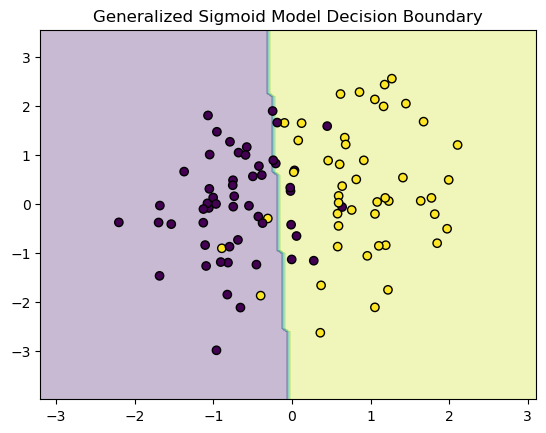

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define generalized sigmoid function
def generalized_sigmoid(x, alpha=1, beta=0):
    return 1 / (1 + 0.5 * np.exp(-alpha * (x - beta)))

# Log-likelihood function for models
def log_likelihood(X, y, w, activation):
    logits = X @ w  # Compute w^T x
    probs = activation(logits)
    probs = np.clip(probs, 1e-10, 1 - 1e-10)  # Avoid log(0) errors
    return np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))

# Gradient of log-likelihood
def gradient(X, y, w, activation):
    logits = X @ w
    probs = activation(logits)
    grad = X.T @ (y - probs)
    return grad

# Gradient ascent algorithm
def train_model(X, y, activation, lr=0.005, epochs=1500):
    w = np.random.randn(X.shape[1]) * 0.1  # Better initialization
    for epoch in range(epochs):
        grad = gradient(X, y, w, activation)
        w += lr * grad  # Gradient ascent update
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Log-Likelihood = {log_likelihood(X, y, w, activation):.4f}")
    return w

# Prediction function
def predict(X, w, activation):
    return (activation(np.dot(X, w)) >= 0.5).astype(int)

# Load dataset (new classification dataset)
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use only the first two features for visualization
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

# Train the generalized sigmoid model using 2D data
w_gen_sigmoid_2D = train_model(X_train_2D, y_train, lambda x: generalized_sigmoid(x, alpha=2, beta=0))
print("Learned weights (Generalized Sigmoid Model):", w_gen_sigmoid_2D)

# Train a standard logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate models
y_pred_gen_sigmoid = predict(X_test_2D, w_gen_sigmoid_2D, lambda x: generalized_sigmoid(x, alpha=2, beta=0))
y_pred_logistic = log_reg.predict(X_test)

print("Test Accuracy (Generalized Sigmoid Model):", accuracy_score(y_test, y_pred_gen_sigmoid))
print("Test Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logistic))

# Additional Metrics
print("F1 Score (Generalized Sigmoid Model):", f1_score(y_test, y_pred_gen_sigmoid))
print("F1 Score (Logistic Regression):", f1_score(y_test, y_pred_logistic))

# Plot decision boundary
def plot_decision_boundary(X, y, model_weights, activation, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], model_weights, activation)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test_2D, y_test, w_gen_sigmoid_2D, lambda x: generalized_sigmoid(x, alpha=2, beta=0), "Generalized Sigmoid Model Decision Boundary")